# Examen
Integrantes: Miguel Cisterna, Matias Veliz, Maximiliano Valdes

#Prueba 1

#Entendimiento del negocio:
###El videojuego counter strike global ofensive, es un videojuego que consiste de un modo principal de 5vs5, el cual esta separado en partidos y a su ves estos partidos estan separados por rondas, para poder ganar rondas los jugadores deben matar a todo el equipo contrario, por su parte los equipos se dividen entre terrorista y contra terrorista, los cuales juegan en distintos mapas, de los cuales en este dataframe son los 4 principales del modo de juego competitivo, a continuacion se presentaran nuestras hipotesis e inteneramos refutarlas o valida

#Entendimiento de los datos

Importamos las principales librerias que vamos a usar para poder trabajar de manera mas eficiente

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

Importamos el archivo y lo designamos como df (dataframe), el cual le asignamos la separacion de ";" ya que el archivo original no estaba separado, por su parte ademas con df.head mostramos las primeras 10 filas de cada columna para poder reconocerlas

In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
df = pd.read_csv(name, sep=";")
df.head(10)

Saving Anexo ET_demo_round_traces_2022 (1).csv to Anexo ET_demo_round_traces_2022 (1).csv


<ipython-input-2-1060ce05a55b>:5: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(name, sep=";")


,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,600,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,750,4400,0,0,0,0
1,601,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,800,4400,0,0,0,0
2,602,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,1000,4400,0,0,0,0
3,603,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,850,4400,0,0,0,0
4,604,de_inferno,Terrorist,1,4,1,False,True,True,False,...,0,0,0,0,1000,4400,0,0,0,0
5,605,de_inferno,CounterTerrorist,2,4,1,True,False,True,False,...,0,0,0,0,850,3750,0,0,0,0
6,606,de_inferno,CounterTerrorist,2,4,1,True,False,True,False,...,0,0,0,0,400,3750,0,0,0,0
7,607,de_inferno,CounterTerrorist,2,4,1,True,False,True,False,...,0,1,0,0,800,3750,0,0,1,0
8,608,de_inferno,CounterTerrorist,2,4,1,True,False,True,False,...,3,0,1,1,850,3750,3,1,0,1
9,609,de_inferno,CounterTerrorist,2,4,1,True,False,True,False,...,2,0,2,0,850,3750,2,0,0,2


In [ ]:
print ('Los datos de entrenamiento tienen {0} filas y {1} columnas'.format(df.shape[0],df.shape[1]))

Los datos de entrenamiento tienen 79157 filas y 30 columnas


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   79157 non-null  int64  
 1   Map                          79157 non-null  object 
 2   Team                         79155 non-null  object 
 3   InternalTeamId               79157 non-null  int64  
 4   MatchId                      79157 non-null  int64  
 5   RoundId                      79157 non-null  int64  
 6   RoundWinner                  79157 non-null  object 
 7   MatchWinner                  79156 non-null  object 
 8   Survived                     79157 non-null  bool   
 9   AbnormalMatch                79157 non-null  bool   
 10  TimeAlive                    79157 non-null  object 
 11  TravelledDistance            79157 non-null  object 
 12  RLethalGrenadesThrown        79157 non-null  int64  
 13  RNonLethalGrenad

Con df.info podemos ver la clase de datos que son cada una de las columnas, y como podemos ver hay datos que por ejemplo son booleanos pero esta como object, como ejemplo es roundwinner y matchwinner, deberian ser bool.

In [ ]:
df.columns[df.isnull().any()]

Index(['Team', 'MatchWinner'], dtype='object')

A su vez, dentro del codigo .info, nos dice que ningun atributo o columna posee datos faltantes, mientras que si verificamos con un codigo mas especifico, podemos ver que el DataSet posee 2 columnas con datos faltantes, los cuales son 'Team' y 'MatchWinner'

Con el metodo que utlizamos a continuacion .describe() nos enseña un resumen estadistico de las columnas presentes en el df el cual significa,


*   count o conteo = numero de elementos no nulos en cada columna
*   media o mean = promedio aritmetico de los valores de cada columna
* std o desviacion estandar = medida de dispersion de los valores en cada columna
* min = valor minimo
* cuartil 25% = valor que separa el 25% mas bajo de los datos
* cuartil 50% = valor que separa el 50% mas bajo de los datos
* cuartil 75% = valor que separa el 75% mas bajo de los datos
* max = valor maximo de cada columna

Cada uno de estos nos ayuda a poder entender de mejor manera los datos y poder conocer sus valores como tal.

In [ ]:
df.describe()

,Unnamed: 0,InternalTeamId,MatchId,RoundId,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
count,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,...,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000
mean,60570.193640,1.500006,250.525033,12.765517,0.498667,1.258057,0.675363,0.089840,0.005964,0.007046,...,0.671349,0.146178,0.301553,0.095633,3778.108695,18890.133532,8.511578,1.209912,1.874831,3.858484
std,36436.598386,0.500003,149.557804,7.432837,0.597985,1.184909,0.464125,0.279797,0.075497,0.082453,...,0.881798,0.385601,0.578843,0.320641,2111.285406,9743.203024,6.195079,1.435150,1.824027,3.246752
min,600.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30830.000000,1.000000,128.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1600.000000,10900.000000,3.000000,0.000000,0.000000,1.000000
50%,56720.000000,2.000000,236.000000,12.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,4700.000000,22550.000000,8.000000,1.000000,1.000000,3.000000
75%,90639.000000,2.000000,373.000000,19.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,5200.000000,26050.000000,13.000000,2.000000,3.000000,6.000000
max,123779.000000,2.000000,511.000000,36.000000,4.000000,6.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,4.000000,5.000000,5.000000,8850.000000,36150.000000,41.000000,11.000000,14.000000,22.000000


In [ ]:
df['RoundWinner'].value_counts()

False     23195
True      23194
False     16393
True      16374
False4        1
Name: RoundWinner, dtype: int64

In [ ]:
df.var()

<ipython-input-8-28ded241fd7c>:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.var()


Unnamed: 0                     1.327626e+09
InternalTeamId                 2.500032e-01
MatchId                        2.236754e+04
RoundId                        5.524707e+01
MatchWinner                    2.490537e-01
Survived                       2.406985e-01
AbnormalMatch                  0.000000e+00
RLethalGrenadesThrown          3.575864e-01
RNonLethalGrenadesThrown       1.404008e+00
PrimaryAssaultRifle            2.154121e-01
PrimarySniperRifle             7.828613e-02
PrimaryHeavy                   5.699764e-03
PrimarySMG                     6.798427e-03
PrimaryPistol                  1.725998e-01
RoundKills                     7.775678e-01
RoundAssists                   1.486884e-01
RoundHeadshots                 3.350591e-01
RoundFlankKills                1.028104e-01
RoundStartingEquipmentValue    4.457526e+06
TeamStartingEquipmentValue     9.493001e+07
MatchKills                     3.837901e+01
MatchFlankKills                2.059656e+00
MatchAssists                   3

Como podemos apreciar, con el describe no se nos presentaban algunos datos necesarios para conocer mejor sus distribuciones, es por eso que con este codigo podemos observar la varianza de las variables numericas

In [ ]:
#Moda de los atributos
df_mode = df.mode()
print(df_mode.iloc[0])

Unnamed: 0                            600
Map                            de_inferno
Team                            Terrorist
InternalTeamId                        2.0
MatchId                              29.0
RoundId                               1.0
RoundWinner                         False
MatchWinner                         False
Survived                            False
AbnormalMatch                       False
TimeAlive                             0.0
TravelledDistance                     0.0
RLethalGrenadesThrown                 0.0
RNonLethalGrenadesThrown              0.0
PrimaryAssaultRifle                   1.0
PrimarySniperRifle                    0.0
PrimaryHeavy                          0.0
PrimarySMG                            0.0
PrimaryPistol                         0.0
FirstKillTime                         0.0
RoundKills                            0.0
RoundAssists                          0.0
RoundHeadshots                        0.0
RoundFlankKills                   

Al igual que el ejemplo anterior, con el describe no se pueden ver algunos datos, en este caso, podemos ver la moda de las variables numericas, donde las de mas interes que podemos represntar seria que mapa se juega mas, el dinero por ronda de cada equipo como a su vez por partida.

In [ ]:
df['Map'].value_counts()

de_inferno    28869
de_dust2      19120
de_mirage     19019
de_nuke       12149
Name: Map, dtype: int64

Con este codigo verificamos que efectivamente la moda es valida ya que podemos ver como el mapa que mas se repite es "de_inferno"

In [ ]:
df['RoundKills'].value_counts()

0    43169
1    22997
2     9486
3     2914
4      524
5       67
Name: RoundKills, dtype: int64

Lo mimso con Kills por ronda, el valor que mas se repite es 0 lo cual nos dice que muchos jugadores mueren o sobreviven sin matar a ningun jugador del equipo enemigo

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'InternalTeamId'}>,
        <Axes: title={'center': 'MatchId'}>,
        <Axes: title={'center': 'RoundId'}>,
        <Axes: title={'center': 'RLethalGrenadesThrown'}>],
       [<Axes: title={'center': 'RNonLethalGrenadesThrown'}>,
        <Axes: title={'center': 'PrimaryAssaultRifle'}>,
        <Axes: title={'center': 'PrimarySniperRifle'}>,
        <Axes: title={'center': 'PrimaryHeavy'}>,
        <Axes: title={'center': 'PrimarySMG'}>],
       [<Axes: title={'center': 'PrimaryPistol'}>,
        <Axes: title={'center': 'RoundKills'}>,
        <Axes: title={'center': 'RoundAssists'}>,
        <Axes: title={'center': 'RoundHeadshots'}>,
        <Axes: title={'center': 'RoundFlankKills'}>],
       [<Axes: title={'center': 'RoundStartingEquipmentValue'}>,
        <Axes: title={'center': 'TeamStartingEquipmentValue'}>,
        <Axes: title={'center': 'MatchKills'}>,
        <Axes: title={'center': 'MatchFlankK

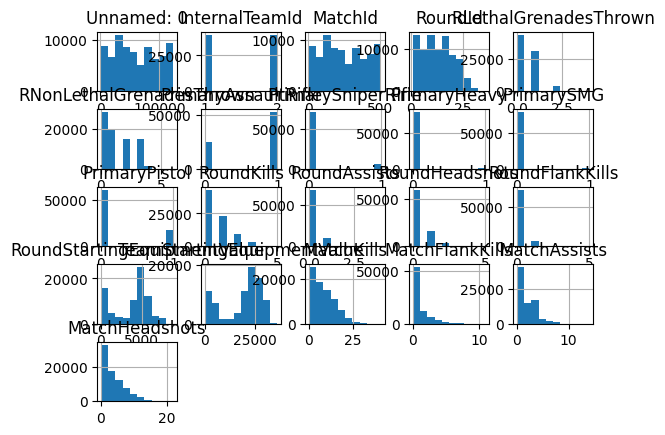

In [ ]:
df.hist()

Podemos observar que al realizar histogramas de las variables numericas del data set, ninguna variable posee una distrubucion normal, todas estan sesgadas, es por eso que iremos realizando un analisis mas profundo de las variables que nos entregarian informacion importante

<Axes: >

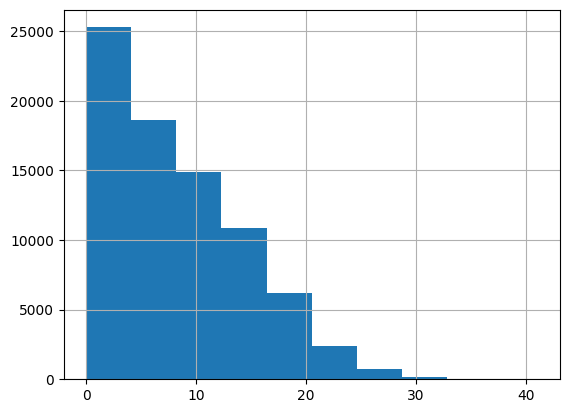

In [ ]:
df.MatchKills.hist()

Un claro ejemplo de lo anteriormente explicado seria la variable de MatchKills, la cual claramente no posee una distribucion normal ya que la mayoria de los datos estan concentrados hacia la izquierda, teniendo como frecuencia que los match kills seria entre 0 a 4. Una vez explicado esto no tenemos una idea clara de los outliers. Para ello realizaremos un boxplot de la misma variable

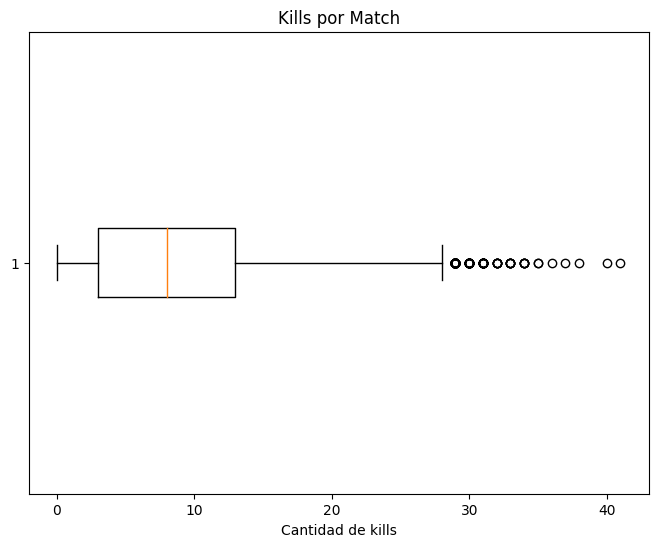

In [ ]:
#Crear un boxplot
plt.figure(figsize=(8, 6))  # Tamaño de la figura
plt.boxplot(list(df['MatchKills']), vert=False)  # vert=False para un boxplot horizontal

#Añadir título y etiquetas a los ejes
plt.title("Kills por Match")
plt.xlabel("Cantidad de kills")

#Mostrar el diagrama de caja
plt.show()

Como podemos ver, gracias a este grafico analizamos cosas que no se podian ver con claridad en el historgrama, y podemos ver algunos casos muy exagerados de outlires, que corresponden fuera del rango de los cuartiles, teniendo como outliers algunos jugadores que realizaron desde 28 kills en adelante, ademas, podemos que que el rango intercuartilico empieza en 3 kills y termina en 13 kills, siendo su mediana un 8 kills


<Axes: >

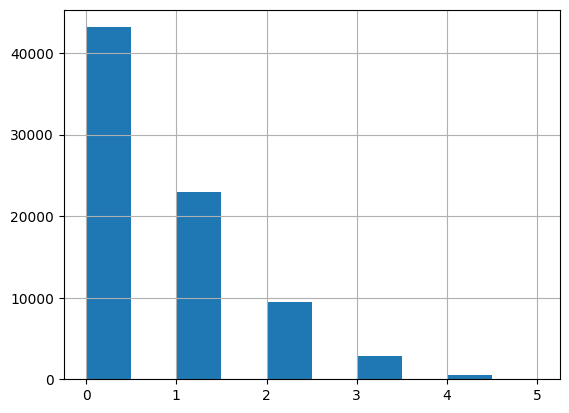

In [ ]:
df.RoundKills.hist()

El histograma de RoundKills tambien podemos ver que esta sesgada ya que no posee distrucion normal, debido a que ni su mediana ni su moda ni su promedio tienen el mismo valor, es por eso que la concentracion de los datos esta cargado para el lado izquierdo y de gual manera que el anterior no se pueden refelejar los datos extremos de los outliers y haremos un grafico que lo muestre de mejor manera.

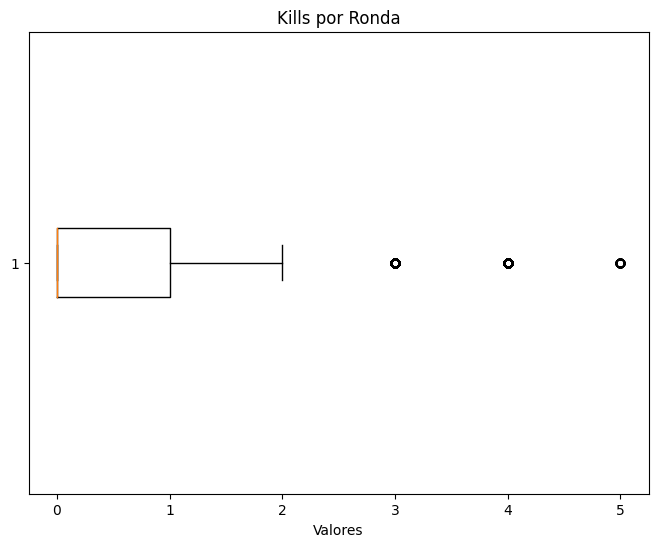

In [ ]:
#Crear un boxplot
plt.figure(figsize=(8, 6))  # Tamaño de la figura
plt.boxplot(list(df['RoundKills']), vert=False)  # vert=False para un boxplot horizontal

#Añadir título y etiquetas a los ejes
plt.title("Kills por Ronda")
plt.xlabel("Valores")

#Mostrar el diagrama de caja
plt.show()

Como se puede apreciar en este grafico de caja, podemos ver que el promedio de las kill por ronda es entre 0 y 1, teniendo como outliers 3, 4 y 5.

<ipython-input-17-a754daae51a6>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='RoundKills', y='Map', data=df, estimator=sum, ci=None)


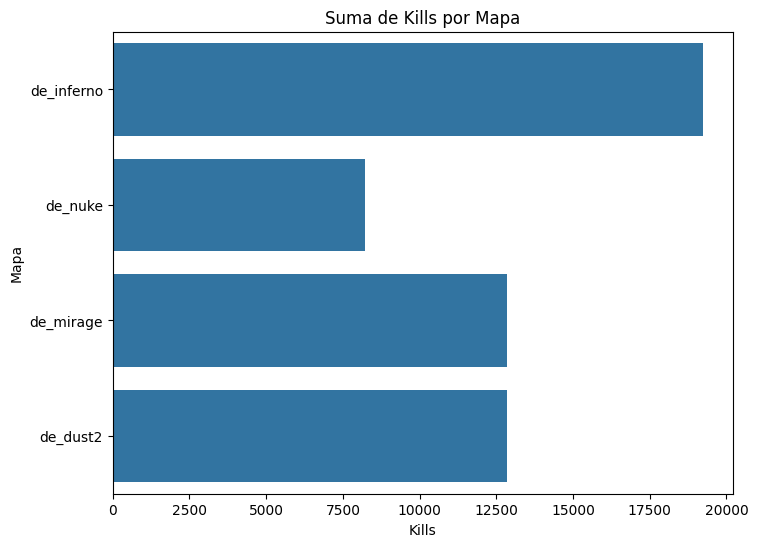

Map
de_dust2      12851
de_inferno    19246
de_mirage     12836
de_nuke        8209
Name: RoundKills, dtype: int64


In [ ]:
#Grafico cantidad de kills por mapa
plt.figure(figsize=(8, 6))
sns.barplot(x='RoundKills', y='Map', data=df, estimator=sum, ci=None)

#Añadir título y etiquetas a los ejes
plt.title('Suma de Kills por Mapa')
plt.xlabel('Kills')
plt.ylabel('Mapa')

#Mostrar el gráfico
plt.show()
#Valor exacto
suma_por_categoria = df.groupby('Map')['RoundKills'].sum()

#Mostrar los resultados
print(suma_por_categoria)

Como podemos apreciar tanto en la cuenta de los mapas que mas se repiten y cuanto lo hacen, podemos ver que inferno al ser el mapa mas jugado tiende a tener una mayor numero de kills por suma, por lo que podemos inferir que tienen una correlacion positiva

<ipython-input-76-6b66267908f7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Team', y='TeamStartingEquipmentValue', data=promedio_por_grupo, palette='viridis')


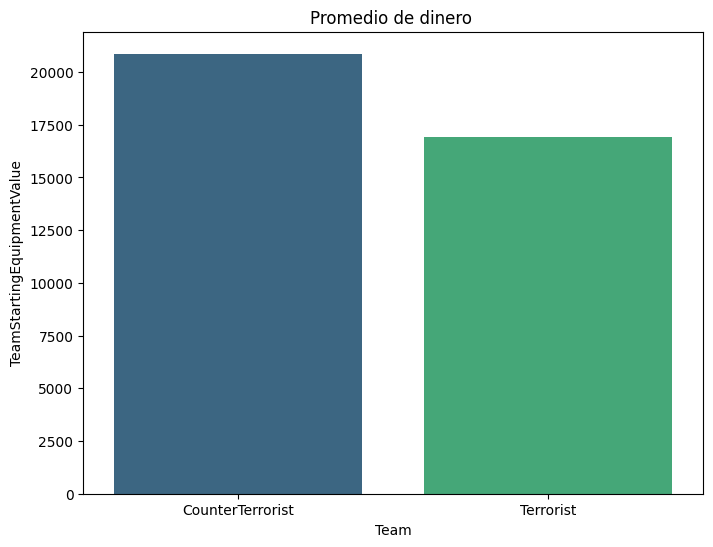

               Team  TeamStartingEquipmentValue
0  CounterTerrorist                20871.169498
1         Terrorist                16910.792857


In [ ]:
#Calcular el promedio por grupo
promedio_por_grupo = df.groupby('Team')['TeamStartingEquipmentValue'].mean().reset_index()

#rear un gráfico de barras del promedio por grupo
plt.figure(figsize=(8, 6))
sns.barplot(x='Team', y='TeamStartingEquipmentValue', data=promedio_por_grupo, palette='viridis')

#Añadir título y etiquetas a los ejes
plt.title('Promedio de dinero ')
plt.xlabel('Team')
plt.ylabel('TeamStartingEquipmentValue')

#Mostrar el gráfico
plt.show()
print(promedio_por_grupo)

Lo que nos explica este grafico es que al  por partida (Match) los counter terrorist tienen un mayor promedio de equipamiento que los terrorista con una diferencia de 4000 puntos de dinero.

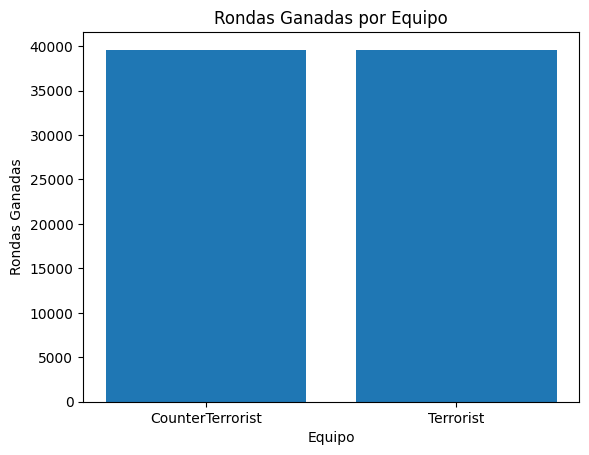

               Team  RondasGanadas
0  CounterTerrorist          39564
1         Terrorist          39591


In [ ]:
rondas_ganadas = df[df['RoundWinner'].notnull()].groupby('Team')['RoundWinner'].count()

resultados1_df = pd.DataFrame({'Team': rondas_ganadas.index, 'RondasGanadas': rondas_ganadas.values})

# Crear un gráfico de barras
plt.bar(resultados1_df['Team'], resultados1_df['RondasGanadas'])
plt.xlabel('Equipo')
plt.ylabel('Rondas Ganadas')
plt.title('Rondas Ganadas por Equipo')
plt.show()
print(resultados1_df)

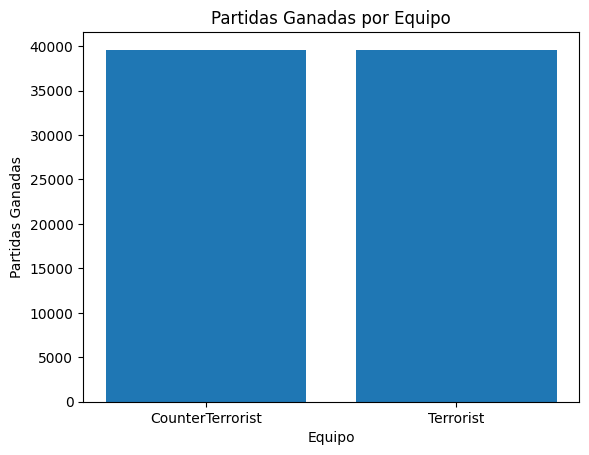

               Team  PartidasGanadas
0  CounterTerrorist            39563
1         Terrorist            39591


In [ ]:
Partidas_ganadas = df[df['MatchWinner'].notnull()].groupby('Team')['MatchWinner'].count()

resultados2_df = pd.DataFrame({'Team': Partidas_ganadas.index, 'PartidasGanadas': Partidas_ganadas.values})

# Crear un gráfico de barras
plt.bar(resultados2_df['Team'], resultados2_df['PartidasGanadas'])
plt.xlabel('Equipo')
plt.ylabel('Partidas Ganadas')
plt.title('Partidas Ganadas por Equipo')
plt.show()
print(resultados2_df)

Como podemos ver en el grafico podemos apreciar que los contraterroristas tienden a gastar mas, pero independientemente de esto, podemos ver que las rondas ganadas son independiente a las cantidad que gastan en promedio cada equipo, ya que estas son muy similares entre si.

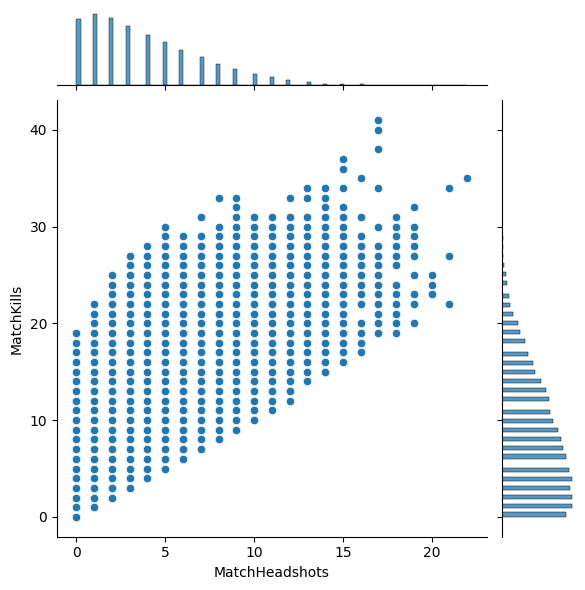

In [ ]:
sns.jointplot(x=df['MatchHeadshots'], y=df['MatchKills'])

En este Grafico de dispersion, podemos ver que es directo, ya que si las kills por partida son mayor, la cantidad de disparos a la cabeza tambien es mayor


<Axes: xlabel='MatchWinner', ylabel='MatchKills'>

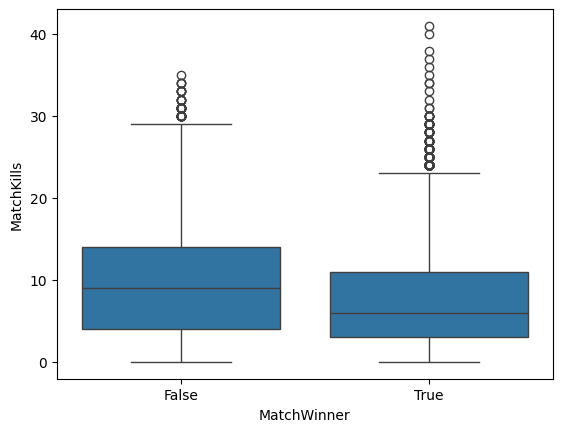

In [ ]:
from seaborn import boxplot
boxplot(x="MatchWinner", y="MatchKills", data=df)

Como se puede ver el el grafico de caja, independientermente de cuantas MatchKills hayan, no te garantiza si ganaras o no la partida, ya que, como se puede ver el grafico, el la mediana de kills de los que no ganaron la partida es mas alta que su contraparte.


#Prueba 2: Analisis y limpieza de datos


####Coeficiente de correlacion

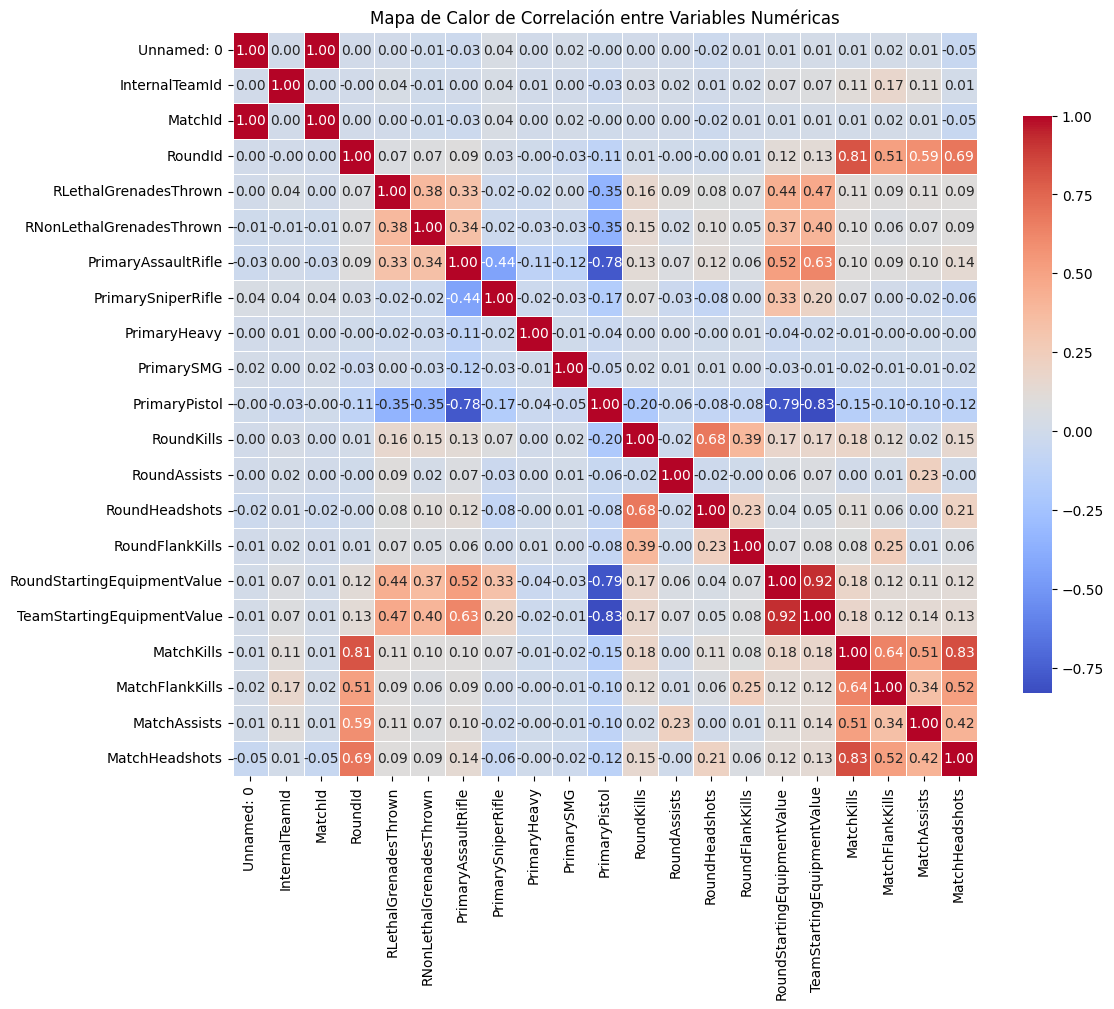

In [ ]:
Columnas_numericas = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 10))
sns.heatmap(Columnas_numericas.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={"shrink": 0.75}, square=True)
plt.title('Mapa de Calor de Correlación entre Variables Numéricas')
plt.show()

In [ ]:
matriz_correlacion = df.corr()
print(matriz_correlacion)

<ipython-input-55-4d97b3ba7f5a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion = df.corr()


                             Unnamed: 0  InternalTeamId   MatchId   RoundId  \
Unnamed: 0                     1.000000        0.000095  0.999979  0.003375   
InternalTeamId                 0.000095        1.000000  0.000027 -0.000008   
MatchId                        0.999979        0.000027  1.000000  0.001476   
RoundId                        0.003375       -0.000008  0.001476  1.000000   
Survived                      -0.003245        0.044872 -0.003239 -0.015361   
AbnormalMatch                       NaN             NaN       NaN       NaN   
RLethalGrenadesThrown          0.002911        0.039136  0.003009  0.065327   
RNonLethalGrenadesThrown      -0.009307       -0.005408 -0.009234  0.073314   
PrimaryAssaultRifle           -0.027305        0.001750 -0.027313  0.085892   
PrimarySniperRifle             0.043187        0.042205  0.043119  0.026291   
PrimaryHeavy                   0.003781        0.006337  0.003769 -0.003975   
PrimarySMG                     0.017790        0.004

##**Analisis**
>
Como podemos observar en el mapa de calor y en el coeficiente de correlacion, hay variables las cuales no estan siendo mostradas o siendo correlacionadas, puesto que estas al tener un valor de tipo object, no se pueden trabajar en las correlaciones, de igual forma estas variables seran trabajadas a futuro para poder correlacionarlas.
>
###**Valores de correlación directa**
Por su parte podemos observar en el mapa de calor y en las matriz de correlacion que por ejemplo, roundkills esta correlacionado de manera directa con roundheadshots, ademas otro ejemplo puede ser PrimaryAssaultRifle con TeamStartingEquipmentValue y RoundStartingEquipmentValue, puesto que estas armas al ser las mas usadas tienden a influir directamente con estas otras variables.
>
###**Valores de correlación inversa**
Como podemos ver las variables que son tipo PrimaryXXXX: Categorizada en AssaultRifle, SniperRifle, SMG, Heavy y Pistol. Nos presenta el porcentaje de uso arma clasificada como primaria. Por lo que podemos decir que la variable de tipo Primary AssaultRifle y Pistol son variables inversas, ya que el uso de una anula el uso de la otra. Ademas primarypiston es inversa con las variables de valor de equipamiento, puesto que los jugadores (EJ: cuando pierden 2 rondas seguidas) tienden a hacer lo que se conoce como ronda economica, la cual consiste en no comprar armas para en la siguiente ronda comprar equipamiento pesado, y la pistola al ser gratuita tiende a ser mas usada en este tipo de rondas, por lo cual el costo del equipamiento de los equipos baja.

Ahora veamos la correlacion con numeros.
Se puede observar que existe una correlacion del 68% entre las kills en una ronda y los disparos a la cabeza en una ronda

In [ ]:
corr = Columnas_numericas.corr()
print (corr['RoundKills'].sort_values(ascending=False)[:15], '\n') #primeros 15 valores
print ('----------------------')
print (corr['RoundKills'].sort_values(ascending=False)[-5:]) # últimos 5 valores

RoundKills                     1.000000
RoundHeadshots                 0.679179
RoundFlankKills                0.391406
MatchKills                     0.183402
RoundStartingEquipmentValue    0.172141
TeamStartingEquipmentValue     0.168600
RLethalGrenadesThrown          0.162721
MatchHeadshots                 0.152600
RNonLethalGrenadesThrown       0.148663
PrimaryAssaultRifle            0.127903
MatchFlankKills                0.115988
PrimarySniperRifle             0.072187
InternalTeamId                 0.033085
MatchAssists                   0.019540
PrimarySMG                     0.018592
Name: RoundKills, dtype: float64 

----------------------
Unnamed: 0       0.003284
MatchId          0.003271
PrimaryHeavy     0.001692
RoundAssists    -0.021482
PrimaryPistol   -0.195501
Name: RoundKills, dtype: float64


Y aqui se puede observar que existe una correlacion del 62% entre el presupuesto inicial del equipo y el rifle de asalto.

In [ ]:
print (corr['TeamStartingEquipmentValue'].sort_values(ascending=False)[:15], '\n') #primeros 15 valores
print ('----------------------')
print (corr['TeamStartingEquipmentValue'].sort_values(ascending=False)[-5:]) # últimos 5 valores

TeamStartingEquipmentValue     1.000000
RoundStartingEquipmentValue    0.922943
PrimaryAssaultRifle            0.627534
RLethalGrenadesThrown          0.466507
RNonLethalGrenadesThrown       0.403791
PrimarySniperRifle             0.199256
MatchKills                     0.178526
RoundKills                     0.168600
MatchAssists                   0.135532
MatchHeadshots                 0.132275
RoundId                        0.127420
MatchFlankKills                0.122455
RoundFlankKills                0.076407
InternalTeamId                 0.073339
RoundAssists                   0.067011
Name: TeamStartingEquipmentValue, dtype: float64 

----------------------
Unnamed: 0       0.014461
MatchId          0.014364
PrimarySMG      -0.013120
PrimaryHeavy    -0.022217
PrimaryPistol   -0.828608
Name: TeamStartingEquipmentValue, dtype: float64


In [ ]:
probabilidad_normal = len(df[df['Survived'] == True ]) / len(df)

print(f"La probabilidad de que un juagador sobreviva es de un: {probabilidad_normal}")

La probabilidad de que un juagador sobreviva es de un: 0.4035398006493425


Como podemos observar la probabilidad de que un jugador sobreviva es de un 40%

In [ ]:
probabilidad_condicional = len(df[df['RoundKills'] == 1][df['RoundHeadshots'] == 1]) / len(df[df['RoundHeadshots'] == 1])

print(f"La probabilidad de que 'RoundKills' sea igual a 1 dado que el 'RoundHeadshots' por ronda es igual a 1 es: {probabilidad_condicional}")

La probabilidad de que 'RoundKills' sea igual a 1 dado que el 'RoundHeadshots' por ronda es igual a 1 es: 0.6602204724409448


<ipython-input-24-6f71c3c49531>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  probabilidad_condicional = len(df[df['RoundKills'] == 1][df['RoundHeadshots'] == 1]) / len(df[df['RoundHeadshots'] == 1])


En este caso vemos la probabilidad condicional de que si existe 1 kill en la ronda la probabilidad de que haya sido con un disparo a la cabeza es de un 66%

In [ ]:
probabilidad_condicional = len(df[df['MatchKills'] == 1][df['MatchHeadshots'] == 1]) / len(df[df['MatchHeadshots'] == 1])

print(f"La probabilidad de que 'MatchKills' sea igual a 1 dado que el 'MatchHeadshots' por partida es igual a 1 es: {probabilidad_condicional}")

La probabilidad de que 'MatchKills' sea igual a 1 dado que el 'MatchHeadshots' por partida es igual a 1 es: 0.23125486465450143


<ipython-input-70-80a7fdf5713b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  probabilidad_condicional = len(df[df['MatchKills'] == 1][df['MatchHeadshots'] == 1]) / len(df[df['MatchHeadshots'] == 1])


Pero por su parte podemos ver que las kills de una partida y el tiro en la cabeza solo implica un 23%, por lo que el realizar una sola kill en toda la partida y que esta sea por un tiro en la cabeza es mas complicado que por rondas

In [ ]:
probabilidad_condicional = len(df[df['RLethalGrenadesThrown'] == 1][df['RoundKills'] == 1]) / len(df[df['RoundKills'] == 1])

print(f"La probabilidad de que 'RoundKills' sea igual a 1 dado que el 'RoundHeadshots' por ronda es igual a 1 es: {probabilidad_condicional}")

La probabilidad de que 'RoundKills' sea igual a 1 dado que el 'RoundHeadshots' por ronda es igual a 1 es: 0.45071096229943036


<ipython-input-26-625e0b5e97b2>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  probabilidad_condicional = len(df[df['RLethalGrenadesThrown'] == 1][df['RoundKills'] == 1]) / len(df[df['RoundKills'] == 1])


Esta probabilidad que de igual manera que las anteriores nos explican mucho sobre el Set de datos, nos explica que la probabilidad de que se lanze una granada letal, y que al lanzarla, esta granada mate a un jugador, es de el 45%

##KPIs:

####Promedio de tiros a la cabeza por ronda y por mapa y Promedio de kills por partida y mapa

In [ ]:
promedio_headshots = df['RoundHeadshots'].mean()
print(f"Promedio de Headshots por Ronda: {promedio_headshots}")

Promedio de Headshots por Ronda: 0.3015526106345617


In [ ]:
promedio_headshots_por_mapa = df.groupby('Map')['RoundHeadshots'].mean()
print("Promedio de Headshots por Ronda por Mapa:")
print(promedio_headshots_por_mapa)

Promedio de Headshots por Ronda por Mapa:
Map
de_dust2      0.308421
de_inferno    0.304998
de_mirage     0.286450
de_nuke       0.306198
Name: RoundHeadshots, dtype: float64


In [ ]:
promedio_kills = df['MatchKills'].mean()
print(f"Promedio de Kills por Partida: {promedio_kills}")

Promedio de Kills por Partida: 8.511578255871243


In [ ]:
promedio_kills_por_mapa = df.groupby('Map')['MatchKills'].mean()
print("Promedio de Kills por Partida por Mapa:")
print(promedio_kills_por_mapa)

Promedio de Kills por Partida por Mapa:
Map
de_dust2      8.404341
de_inferno    8.568811
de_mirage     8.458331
de_nuke       8.627706
Name: MatchKills, dtype: float64


Con estos KPI podemos identificar cuanto es el promedio normal de los tiros a la cabeza y kills por usuario, con esto podemos identificar y darle rangos a los usuarios, ejemplo: oro, plata, bronce, para cada porcentaje, siendo plata el promedio, por su parte tambien podemos usar esta informacion para reconocer usuarios malisiosos y que usan trucos, ya que si tienen un promedio perfecto de headshot por ronda y kill, este usuario debera ser ingresado a revision y poder banearlo para que no pueda seguir usando su cuenta para jugar.

####Partidas por mapa

In [ ]:
partidas_por_mapa = df.groupby('Map').size()
print("Cantidad de Partidas por Mapa:")
print(partidas_por_mapa)

Cantidad de Partidas por Mapa:
Map
de_dust2      19120
de_inferno    28869
de_mirage     19019
de_nuke       12149
dtype: int64


####Contar la cantidad de victorias por equipo y mapa

In [ ]:
victorias_por_equipo_y_mapa = df.groupby(['MatchWinner', 'Map', 'Team']).size().unstack(fill_value=0)
print("Cantidad de Victorias por Equipo y Mapa:")
print(victorias_por_equipo_y_mapa)

Cantidad de Victorias por Equipo y Mapa:
Team                    CounterTerrorist  Terrorist
MatchWinner Map                                    
False       de_dust2                5320       4750
            de_inferno              7908       7860
            de_mirage               5382       4422
            de_nuke                 3393       2981
True        de_dust2                4240       4810
            de_inferno              6525       6573
            de_mirage               4126       5089
            de_nuke                 2669       3106


Con este KPI podemos ver cuales son los mapas con mas desbalance entre ambos lados (terrorist y counterterroris), estos nos ayuda a poder realizar un analisis de cual de ambos lados es por decirlo asi mas "facil" ganar las partidas, estos nos ayuda a poder en futuras actualizaciones poder realizar arreglos o ajustes a los mapas para que el lado en el que juegues no sea decisivo para la victoria. Y así, tener un juego mas equilibrado.

In [ ]:
print('Variables discretas:  Unnamed: 0, RLethalGrenadesThrown, RNonLethalGrenadesThrown, RoundKills, RoundAssists, RoundHeadshots, RoundFlankKills,RoundAssists, RoundStartingEquipmentValue, TeamStartingEquipmentValue, MatchKills, MatchFlankKills, MatchAssists, MatchHeadshots')
print("Variables continuas: PrimaryAssaultRifle, PrimarySniperRifle, PrimaryHeavy, PrimarySMG ")
print("Variables categoricas nominal: Map, Team, RoundWinner, MatchWinner, TimeAlive, TravelledDistance, FirstKillTime")
print("Variables categoricas ordinal: InternalTeamId, MatchId, RoundId ")
print("Variables bianarias o booleanas: Survived ")

Estas son variables clasificadas del set de datos, pero estas poseen errores en sus tipos de variables, es por eso que estan mal calsificados. Los errores mas importante a simple vista, son las variables "TimeAlive, TravelledDistance, FirstKillTime" ya que, estas variables se representan como texto o object cuadno poseen datos numericos relativamente importantes, y como su dato naturalmente no es numerico, no se pueden visualizar graficos ni trabajar con ellas. Otras variables que poseen errores son las de "MatchWinner y RoundWinner" ya que, son de tipo object y poseen datos true o false, por lo que, si poseen estos datos deben de ser variables booleanas.

#Limpieza de datos


In [ ]:
df2 = df.copy()

Realizamos una copia del df original para no alterarlo y borrar datos de manera erronea

A continuacion veremos información sobre nuestros datos.

In [ ]:
df2.info()

Como se muestra anteriormente, el registro total de datos debería ser 79157. Sin embargo columnas como "Team" y "MatchWinner" cuentan con datos faltantes. Al ser tan pocos datos faltantes optamos por eliminarlos. Además tenemos columnas como "Unnamed:0", "AbnormalMatch", "PrimaryHeavy" y "PrimarySMG" que no nos aportan información.
>
También podemos ver los tipos de columnas que hay en el set de datos. Tenemos columnas categoricas de tipo object tales como "Map", "Team", "RoundWinner", "MatchWinner", "TimeAlive", "TravelledDistance" y "FirstTimeKill". Y tenemos columnas numéricas de tipo int y float como "InternalTeamId", "MatchId", "RoundId", "RLethalGrenadesThrown", "RNonLethalGrenadesThrown", "PrimaryAssaultRifle", "PrimarySniperRifle", "PrimaryHeavy", "PrimarySMG", "PrimaryPistol", "RoundKills", "RoundAssists", "RoundHeadshots", "RoundFlankKills", "RoundStartingEquipmentValue", "TeamStartingEquipmentValue", "MatchKills", "MatchFlankKills", "MatchAssists" y "MatchHeadshots".

In [ ]:
#Visualizamos el % de uso promedio de PrimaryHeavy y PrimarySMG en comparacion a PrimaryAssaultRifle
columnas_seleccionadas = ['PrimaryHeavy', 'PrimarySMG', 'PrimaryAssaultRifle']

# Aplicar describe a las columnas seleccionadas
describe_multiple = df[columnas_seleccionadas].describe()

print(describe_multiple)

Vemos que el % de uso promedio, tanto de PrimaryHeavy como de PrimarySMG son menores que el % de uso de promedio PrimaryAssaultRifle. Hay que tener en cuenta que PrimaryAssaultRifle es el arma con más porcentaje de uso promedio. A continuacion vemos un boxplot que nos indica lo anterior

In [ ]:
# Generar gráficas individuales pues las variables numéricas
# están en rangos diferentes
cols_num = ['PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy']

fig, ax = plt.subplots(nrows=len(cols_num), ncols=1, figsize=(15,10))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=df2, ax=ax[i])
    ax[i].set_title(col)

Además de las columnas mencionadas, eliminamos la variable "Team" ya que contamos con "InternalTeamId" que nos facilita el proceso al ser datos numéricos. Eliminamos las columnas y verificamos

In [ ]:
df2.dropna(inplace = True)
df2.drop(columns = ['Unnamed: 0', 'PrimaryHeavy', 'AbnormalMatch', 'PrimarySMG', 'Team'], inplace=True)
df2.info()

In [ ]:
df2.describe()

De aqui podemos inferir bastantes cosas.
>
Primeramente podemos observar que ninguna variable distribuye de forma normal ya que la media, la moda y la mediana no son iguales.
>
**TeamStartingEquipmentValue**


*   La mediana del presupuesto inicial del equipo es de 22.550 y su promedio es de 18.890 aproximadamente.
*   El presupuesto inicial del equipo máximo fue de 36.150 y el minimo fue de 0

**MatchKills**


*   El 75% de los jugadores logró hacer 13 kills o menos
*   El promedio de kills es de 9

**PrimaryAssaultRifle**


*   El porcentaje de uso promedio del rifle de asalto es de 67,5%

In [ ]:
# Conteo de valores únicos en la columna 'MatchKills'
round_winner_counts = df['MatchKills'].value_counts()
print(round_winner_counts)

In [ ]:
#Datos más repetidos en cada columna
df_mode = df2.mode()
print(df_mode.iloc[0])

In [ ]:
df2['MatchWinner'] = df2['MatchWinner'].astype(bool)

df2['MatchWinnerBin']= df2['MatchWinner'].map({True: 1, False: 0})
df2['SurvivedBin']= df2['Survived'].map({True: 1, False: 0})

df2.drop(columns=['MatchWinner'], inplace = True)
df2.drop(columns=['Survived'], inplace = True)

df2['MatchWinnerBin']

Con este codigo, Transformamos los datos de la columna MatchWinner en Booleano par posteriormente mapearlas para dejarlas binarias y poder tratar los datos de una manera mas clara creando una nueva variable llamada MatchWinnerBin y elinamos la columna principal. Ademas tambien transformamos la variable survived para visualizarla mejor en una correlacion de pearson o mapa de calor

In [ ]:
df2['TimeAlive'] = df2['TimeAlive'].str.replace('.', '')
df2['TravelledDistance'] = df2['TravelledDistance'].str.replace('.', '')
df2['FirstKillTime'] = df2['FirstKillTime'].str.replace('.', '')


df2['TimeAlive'] = pd.to_numeric(df2['TimeAlive'], errors='coerce').astype(float)

df2['TravelledDistance'] = pd.to_numeric(df2['TravelledDistance'], errors='coerce').astype(float)

df2['FirstKillTime'] = pd.to_numeric(df2['FirstKillTime'], errors='coerce').astype(float)


df2['TimeAlive']

Con este codigo Transformamos variables importantes que nos serviran para predecir nuestro target a Float, ya que estas eran str o object y no se podian realizar graficos ni calculos con estas.

In [ ]:
df2['TimeAliveMin'] = round(df2['TimeAlive'] / 60, 2)
df2['FirstKillTimeMin'] = round(df2['FirstKillTime'] / 60, 2)

df2.drop(columns = ['TimeAlive', 'FirstKillTime'], inplace = True)

df2[['TimeAliveMin', 'FirstKillTimeMin']].head()

Estas Variables que trasnformamos vienen segundos, por lo que creamos nuevas variables dividiendolas en 60 para que nos den los minutos vivos, y borramos las columnas originales

In [ ]:
df2.describe().T

Verificamos que las variables convertidas funcionen correctamente

In [ ]:
print(f'cantidad de filas antes de eliminar duplicados: {df2.shape}')
df2_sin_duplicados = df2.drop_duplicates()
print(f'cantidad de filas despues de eliminar duplicados: {df2.shape}')

Verificamos si esq ue el data set posee filas duplicadas, y en caso de tener, las eliminamos. En este caso el set de datos NO posee filas duplicadas.

In [ ]:
# Generar gráficas individuales pues las variables numéricas
# están en rangos diferentes
cols_num = ['TravelledDistance', 'RLethalGrenadesThrown', 'RNonLethalGrenadesThrown',
            'PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol', 'RoundKills',
            'RoundAssists', 'RoundHeadshots', 'RoundFlankKills', 'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue',
            'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots', 'TimeAliveMin', 'FirstKillTimeMin']

fig, ax = plt.subplots(nrows=len(cols_num), ncols=1, figsize=(15,60))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=df2, ax=ax[i])
    ax[i].set_title(col)

Realizamos Boxplot de nuestras variables numericas para verificar ourliers.

In [ ]:
# Seleccionar filas con al menos un valor nulo
filas_con_nulos = df2[df2.isnull().any(axis=1)]

# Mostrar las filas con valores nulos
print(filas_con_nulos.head())

    Unnamed: 0         Map              Team  InternalTeamId  MatchId  \
13         613  de_inferno               NaN               1        4   
27         627  de_inferno               NaN               2        4   
29         629  de_inferno  CounterTerrorist               2        4   

    RoundId RoundWinner MatchWinner  Survived  AbnormalMatch  ... RoundKills  \
13        2        True        True     False          False  ...          0   
27        3       False       False      True          False  ...          1   
29        3      False4         NaN      True          False  ...          0   

   RoundAssists  RoundHeadshots  RoundFlankKills  RoundStartingEquipmentValue  \
13            0               0                0                          300   
27            0               0                0                         3250   
29            0               0                0                         4250   

    TeamStartingEquipmentValue  MatchKills  MatchFlankKills  

Verificamos las filas que contienen valores nulos (NaN) y visualizamos si son datos que seran de relevancia para la preparacion de los datos.

In [ ]:
# Seleccionar filas con al menos un valor nulo
filas_con_nulos = df2[df2.isnull().any(axis=1)]

# Mostrar las filas con valores nulos
print(filas_con_nulos.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79154 entries, 0 to 79156
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Map                          79154 non-null  object 
 1   Team                         79154 non-null  object 
 2   MatchId                      79154 non-null  int64  
 3   RoundId                      79154 non-null  int64  
 4   RoundWinner                  79154 non-null  object 
 5   MatchWinner                  79154 non-null  object 
 6   Survived                     79154 non-null  bool   
 7   TimeAlive                    79154 non-null  object 
 8   TravelledDistance            79154 non-null  object 
 9   RLethalGrenadesThrown        79154 non-null  int64  
 10  RNonLethalGrenadesThrown     79154 non-null  int64  
 11  PrimaryAssaultRifle          79154 non-null  float64
 12  PrimarySniperRifle           79154 non-null  float64
 13  PrimaryHeavy    

In [ ]:
df2.dropna(inplace = True)
# Seleccionar filas con al menos un valor nulo
filas_con_nulos = df2[df2.isnull().any(axis=1)]

# Mostrar las filas con valores nulos
print(filas_con_nulos.head())

En estecaso, lo que hicicmos fue eliminar las filas que posean datos faltants, tomamos esta decision ya que las filas que poseen datos faltantes solo son 3 y ademas estas filas no poseen datos relevantes para nuestro futuro modelo, esto se debe a que no posee una gran cantidad de MatchKills, RoundKills, y en en RoundWinner una de las filas tiene un dato extraño 'False4'. Ademas eliminamos las columnas que no creemos que sean relevantes.

In [ ]:
df2.drop(df2.query('RLethalGrenadesThrown >=  3.0').index, inplace=True)

In [ ]:
df2.drop(df2.query('RNonLethalGrenadesThrown >=  6.0').index, inplace=True)

In [ ]:
df2.drop(df2.query('RoundKills >=  4.0').index, inplace=True)

In [ ]:
df2.drop(df2.query('MatchKills >= 28').index, inplace=True)

In [ ]:
df2.drop(df2.query('MatchAssists > 8').index, inplace=True)

In [ ]:
df2.drop(df2.query('MatchFlankKills >= 6').index, inplace=True)

In [ ]:
df2.drop(df2.query('MatchHeadshots >= 14').index, inplace=True)

In [ ]:
df2.drop(df2.query('TravelledDistance == 0.0 and TimeAliveMin == 0.0 and FirstKillTimeMin == 0.0 and MatchKills == 0').index, inplace=True)

Lo querealizamos anteriormente fue tratar los valores outliers correspondientes, segun los boxplot o graficos de caja que realizamos para identificar el rango de los cuales se excede el grafico. como se puede ver, eliminamos valores extremos delas granadas lanzadas mayores a 3 por juego, las granadsas no letales mayores o iguales a 6 en el juego, las kills por ronda que sean mayores a 4, las kills por partida que sean mayores a 28, las asistencias por aprtidas que sean mayores a 8, las kills por flankeo en las partidas mayores o igual a 6, los disparos a la cabeza por partida mayores o igual a 14 y como ultima instancia, hicimos un analisis de aquellos jugadores que no caminaron en el juego, no tienen tiempo vivo, que no realizaron ninguna kill en la partida, los tomamos como jugadores que estan en la partida pero no que se consideran AFK (lejos del teclado o que no estan jugando),por lo que no tiene un impacto o son datos significativos para nuestro futuro modelo.

In [ ]:
#Columnas innecesarias
df2.drop(columns = ['Unnamed: 0', 'InternalTeamId', 'AbnormalMatch', 'PrimarySMG', 'MatchId', 'RoundWinner'], inplace=True)
df2.info()

Procedemos a eliminar las columnas que no usaremos o creemos que son irrelevantes para un futuro analisis


In [ ]:
from sklearn.preprocessing import StandardScaler

# Suponiendo que 'datos' es tu conjunto de datos a estandarizar
# Pueden ser un DataFrame de pandas o una matriz de numpy, dependiendo de tus datos
# En este ejemplo, asumiré que 'datos' es un DataFrame de pandas

# Crear un objeto StandardScaler
scaler = StandardScaler()

# Seleccionar las columnas o el conjunto de datos a estandarizar
columnas_a_estandarizar = ['RoundId', 'TravelledDistance', 'RLethalGrenadesThrown', 'RNonLethalGrenadesThrown', 'PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy', 'PrimaryPistol', 'RoundKills', 'RoundAssists', 'RoundHeadshots', 'RoundFlankKills', 'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue', 'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots', 'MatchWinnerBin', 'SurvivedBin', 'TimeAliveMin', 'FirstKillTimeMin']
datos_estandarizados = df2[columnas_a_estandarizar]

# Ajustar el scaler a los datos y transformar las columnas seleccionadas
datos_estandarizados = scaler.fit_transform(datos_estandarizados)

# Crear un nuevo DataFrame con los datos estandarizados
datos_estandarizados = pd.DataFrame(datos_estandarizados, columns=columnas_a_estandarizar)

# Imprimir el DataFrame resultante
print(datos_estandarizados)

Aqui estandarizamos los datos ya que poseia mejores acaracterizticas para estandarizar que escalar

In [ ]:
from sklearn.preprocessing import OneHotEncoder

codificador = OneHotEncoder()

codificacion = codificador.fit_transform(df2[["Map"]])

#print(type(codificacion))
#print(codificacion)
#print(codificacion.toarray())

nuevas_cols = pd.DataFrame(codificacion.toarray(),
                           columns=codificador.categories_)
print(nuevas_cols)

df2 = pd.concat([df2, nuevas_cols], axis="columns")

df2

El codigo aveces regenra valores nulos por eos lo ejecutamos de los ultimos